# Завдання
## 1. Методами порогової та морфологічної обробки відобразити тільки контури циферблату
 Завантажити зображення "digit.jpg" директорії "./examples/"
 
<table><tr>
<td> <img src="https://github.com/VladisIove/digital_signal_processing/blob/master/Labs/Lab6/digit.jpg?raw=1" height="500" width="500"> </td>
</tr></table>

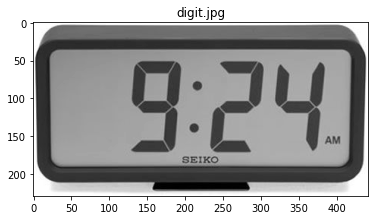

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('./digit.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255);
plt.title("digit.jpg");
plt.show();

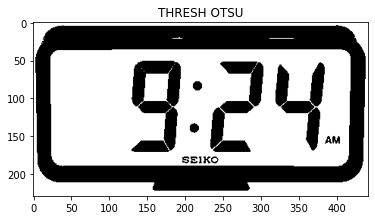

In [25]:
ret, thresh_trun = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
plt.imshow(thresh_trun, cmap = 'gray'); 
plt.title('THRESH OTSU');
plt.show();

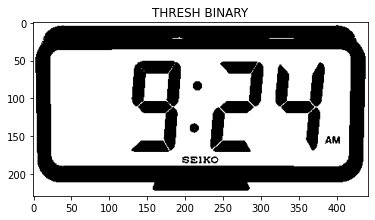

In [26]:
ret2, thresh_trun2 = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_trun2, cmap = 'gray'); 
plt.title('THRESH BINARY');
plt.show();

## 2. Методами порогової та морфологічної обробки відобразити границі баскетбольного поля
 Завантажити зображення "basketball.jpg" директорії "./examples/"
 
<table><tr>
<td> <img src="https://github.com/VladisIove/digital_signal_processing/blob/master/Labs/Lab6/basketball.jpg?raw=1" height="500" width="500"> </td>
</tr></table>

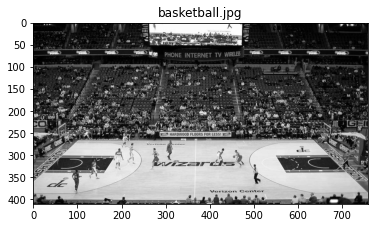

In [27]:
image2 = cv2.imread("./basketball.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image2, cmap = 'gray', vmin = 0, vmax = 255);
plt.title("basketball.jpg");
plt.show();

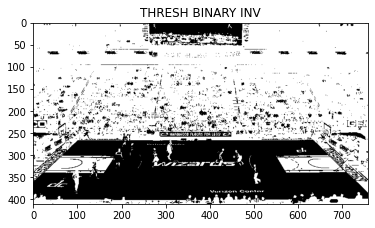

In [36]:
ret3,thresh_trun3 = cv2.threshold(image2, 127, 250, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_trun3, cmap = 'gray'); 
plt.title('THRESH BINARY INV'); 
plt.show();

### 2. Визначити область зображення на якій зображений QR-код - x, y, ширина, висота. Відобразити баундинг бокс.

Завантажити зображення "frame1.jpg" директорії "./examples/".

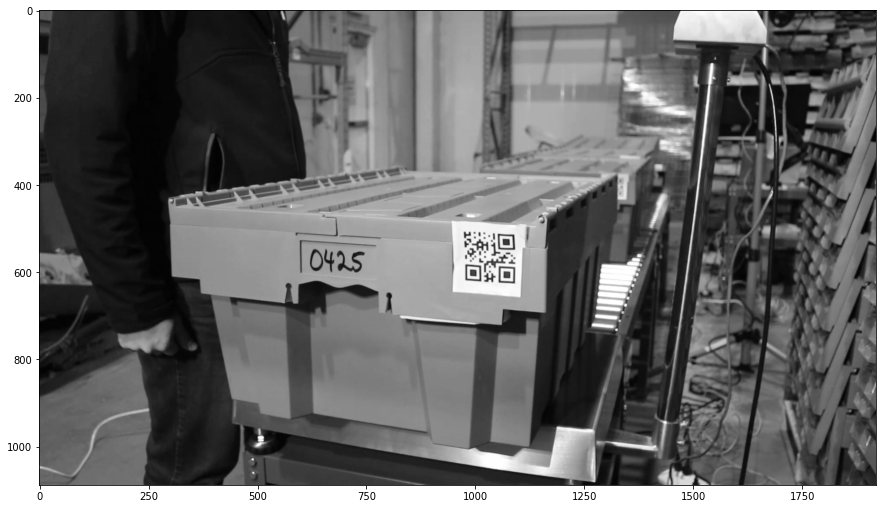

In [51]:
image3 = cv2.imread('./frame1.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (15,15))
plt.imshow(image3, cmap = 'gray', vmin = 0, vmax = 255);
plt.show();

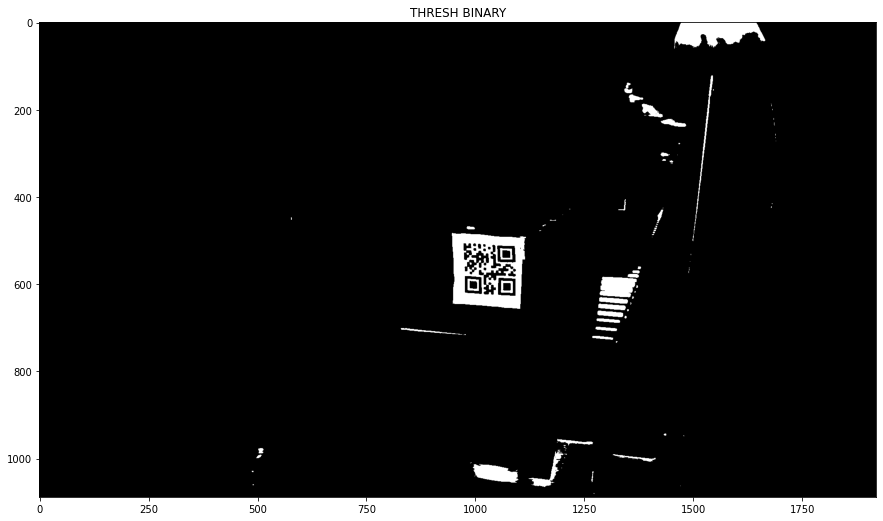

Height : 1800
Width : 1900


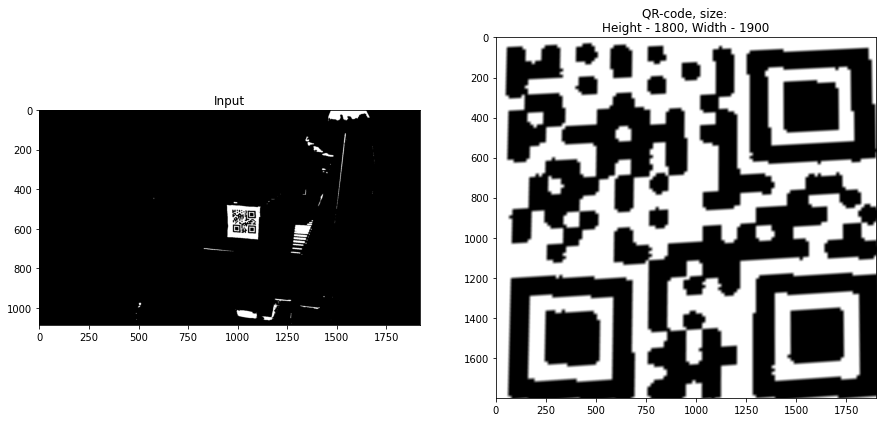

In [204]:
ret4,thresh_trun4 = cv2.threshold(image3,225,255,cv2.THRESH_BINARY)
plt.figure(figsize=(15,15))
plt.imshow(thresh_trun4, cmap = 'gray'); 
plt.title('THRESH BINARY'); 
plt.show();

src = np.float32([[970,503], [1100, 510], [1090, 627],[973,625]])
dst = np.float32([[0, 0],[2000,10],[1870,1800], [0, 1900]])

M = cv2.getPerspectiveTransform(src, dst)
wraped_img = cv2.warpPerspective(thresh_trun4, M, (1900,1800))

shape = wraped_img.shape
height = shape[0]
width = shape[1]

print("Height : %d" % height)
print("Width : %d" % width)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(thresh_trun4, cmap = 'gray'),plt.title('Input')
plt.subplot(122),plt.imshow(wraped_img, cmap = 'gray'),plt.title("QR-code,"+" size: \n"+"Height - %d, " % height + "Width - %d" % width)
plt.show()
